# FEM Solution to Poisson Equation in 1D

In [144]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Poisson's Equation 1D

Comparison of FEM and exact solutions for the following equation

$$ \frac{d^2T}{dx^2} = -50 e^x $$

with boundary conditions $T(\pm 1) = 100 $

In [145]:
# problem boundaries
x_start, x_end = -1.0, 1.0
x = np.linspace(x_start, x_end, 100)

### Exact Solution
Exact solution can easily be determined by integrating twice and is given by 
$$ T = -50 e^{-x} + 50sinh(1)x + 50cosh(1) + 100 $$

Text(0, 0.5, 'T (exact)')

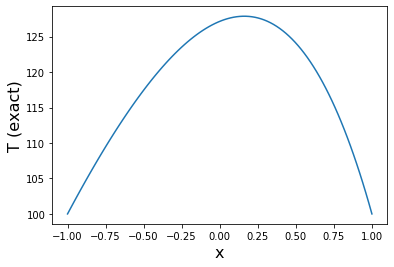

In [146]:
# exact solution
T_ex = -50*np.exp(x) + 50*np.sinh(1)*x + 50*np.cosh(1) + 100

# plot solution and format the graph
plt.plot(x,T_ex)
plt.xlabel('x', fontsize=16)
plt.ylabel('T (exact)', fontsize=16)

### Solution by Method of Collocation

Consider a trial solution $\tilde{T}(x) $ given by 
$$ \tilde{T} = 100 + a_1 \phi_1(x) + a_2\phi_2(x) $$

where $a_1, a_2$ are unknown constant coefficients, $\phi_1(x), \phi_2(x)$ are known "basis functions"

we choose the following basis functions
$$ \phi_1 = (1+x)(1-x) \\ \phi_2 = x(1+x)(1-x) $$

Note how the basis functions satisfy $\phi(\pm 1) = 0$ thus ensuring that $\tilde{T}(x)$ alwasy satisfies the boundary condition $\tilde{T}(\pm 1) = 100 $

We define a "Residual" as
$$ R(\tilde{T},x) \equiv \frac{dT^2}{dx^2} + 50e^x $$

Note how the residual takes a trial function $\tilde{T}$ and x as an argument. $R(\tilde{T},x)$ quantifies by how much a trial function $\tilde{T}$ fails the differential equation at a particular x

Since we have two unknowns $a_1, a_2$, we can set ourselves up so that $\tilde{T}$ solves the differential equation at exactly two points!

First we plug in the test function into the expression for residual
$$ \frac{d^2 \phi_1}{dx^2} = -2 \\ \frac{d^2 \phi_2}{dx^2} = -6x$$

$$R(\tilde{T},x) = -2a_1 -6a_2x + 50e^x $$

Let us pick the two points as $x=1/3$ and $x=-1/3$

If the trial solution $\tilde{T}$ solves the differential equation exactly at these two points, then we have
$$ R(\tilde{T}, x=\pm 1/3) = 0 $$

That is

$$ -2a_1 -2a_2 + 50e^{1/3} = 0 \\ -2a_1 +2a_2 + 50e^{-1/3} = 0 $$

We can solve this linear system of equations to find $a_1, a_2$

In [147]:
A = np.array([[-2, -2], [-2, 2]]) # coefficients of a1 and a2
b = np.array([[-50*np.exp(1/3)],[-50*np.exp(-1/3)]])
X = np.linalg.solve(A,b) # solve for unknowns a1 and a2 

# unpack a1 and a2 from X
a1 = X[0,0]
a2 = X[1,0]
print("a1 = {} \n a2 = {}".format(a1,a2))

a1 = 26.401796695748487 
 a2 = 8.488513931403753


Now that we have solved for $a_1$ and $a_2$, we have our approximate solution
$$ \tilde{T} = 100 + a_1(1+x)(1-x) +a_2x(1+x)(1-x) $$

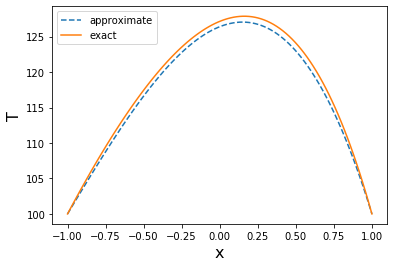

In [148]:
# plotting the approximate solution
T_approx = 100 + a1*(1+x)*(1-x) + a2*x*(1+x)*(1-x)
plt.plot(x,T_approx, linestyle="--", label="approximate")

#plot the exact solution for comparison
plt.plot(x,T_ex, label="exact")

# format the graph
plt.xlabel("x", fontsize="16")
plt.ylabel("T", fontsize="16")
plt.legend()


### Solution by Method of Weighted Residuals (Galerkin Method)

Recall the residual we defined earlier

$$ R(\tilde{T}, x) = \frac{d^2 \tilde{T}}{dx^2} +50e^x $$

We know that the exact solution will satisfy 

$$ \int_{-1}^1 \frac{d^2 \tilde{T}}{dx^2} + 50e^x ~dx = 0 $$

or

$$ \int_{-1}^1 R(\tilde{T}, x) ~dx = 0 $$

Now, guessing a solution $\tilde{T}$ that drives this integral to zero, can mean that on an average over the entire domain the error is zero, but might still be very poor solution locally

The exact solution, however, will have this special property:

$$ \int_{-1}^1 w(x) R(\tilde{T}, x)~ dx = 0 $$

That is, the integral will continue to be zero, no matter what function $w(x)$ (refered to as weight function) you multiply $R$ with. A close approximate solution will keep the the same integral to a low value perhaps for many choices of $w(x)$. So swapping out $w(x)$ with many possible functions might be a way to test how good the solution is. 

Or, we can start with a test function $\tilde{T}$ with unknown coefficients $a_i$, find $R(\tilde{T},x)$ and determine $a_i$ 
such that the integral is kept to minimum with respect to a finite number of known function $w(x)$ that we have kept handy. 

How many is finite? since we have $a_i$ unknown coefficients, having $i$ number of weight functions $w_i(x)$ will uniquely determine those $a_i$. We don't have to look far to find those number of weight functions, we can simply re-use our basis functions. This choice is called Galerkin Method. 


Let us define the "weighted residual" as

$$ \Pi_i(\tilde{T}) =  \int_{-1}^1 w_i(x) ~R(\tilde{T}, x)~ dx = 0 $$

Now we have

$$ \Pi_1 = \int_{-1}^1 (1+x)(1-x)(-2a_1 -6a_2x + 50e^x)~ dx \\ \Pi_2 = \int_{-1}^1 x(1+x)(1-x)(-2a_1 -6a_2x + 50e^x)~ dx $$

fastforwarding through these integrations

$$ \Pi_1(\tilde{T}) = -\frac{8}{3}a_1 + 200e^{-1} \\ \Pi_2(\tilde{T}) = -\frac{8}{5}a_2 + 100e^{-1} - 700e^{-1} $$

Setting $\Pi_1, \Pi_2$ to zero, we get a system that can be solved for $a_1, a_2$


$$ -\frac{8}{3}a_1 + 200e^{-1} =0 \\ -\frac{8}{5}a_2 + 100e^{-1} - 700e^{-1} =0 $$


In [149]:
# coefficients of a_1 and a_2
C = np.array([[-8/3, 0],[0, -8/5]])
d = np.array([[-200*np.exp(-1)], [-100*np.exp(1) + 700*np.exp(-1)]])
y = np.linalg.solve(C,d)

# unpack a_1 and a_2
a_1, a_2 = y[0,0], y[1,0]
print("a_1={} \n a_2={}".format(a_1,a_2))

a_1=27.590958087858176 
 a_2=8.945358766184306


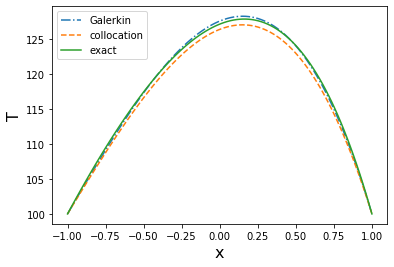

In [150]:
T_FEM = 100 + 27.59*(1+x)*(1-x) + 8.95*x*(1+x)*(1-x)
# plot results
plt.plot(x, T_FEM, linestyle="-.", label="Galerkin")       # Galerkin Method
plt.plot(x, T_approx, linestyle="--", label="collocation") # collocation method
plt.plot(x, T_ex, label="exact")                           # exact solution
plt.xlabel("x", fontsize="16"), plt.ylabel("T", fontsize="16")
plt.legend()



### Solution Using Finite Elements by Galerkin Method

Consider the same differential equation

$$ \frac{d^2T}{dx^2} = -50e^x $$


Using a general and condensed notation, we write this as

$$ T_{xx} + f = 0 $$

Using a general and condensed notation, we write this as

$$ T_{xx} + f = 0 $$

Now, let us discretize the domain into 10 **elements** bounded by 11 **nodes** that are equally spaced. 

The **nodes** are indexed starting at zero from the left. 

**Elements** are by bound two nodes and also indexed from left to right starting at zero.

Text(1.0, 0.001, 'node j=5')

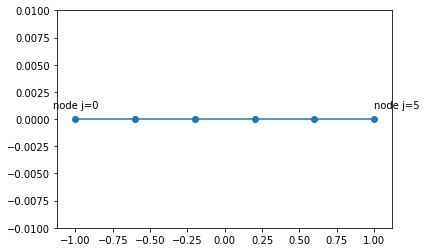

In [151]:
n_elem = 5 # number of elements
x_nodes = np.linspace(x_start, x_end, n_elem+1) # x coordinate of each node
dx = abs(x_nodes[1] - x_nodes[0]) # element length

# show discretized domain
plt.plot(x, np.zeros(np.shape(x)))            # plot the x axis
plt.scatter(x_nodes, np.zeros(np.shape(x_nodes))) # plot the nodes
plt.ylim(-0.01, 0.01)

# show node indexing
plt.text(x_start,0.001, "node j=0", horizontalalignment="center")
plt.text(x_end, 0.001, "node j={}".format(n_elem))

Now, let us again assume a trial solution of the form

$$ \tilde{T} = \sum_{i=1}^{N} a_i \phi_i $$

Let us choose a particular basis function $ \phi_j$ as follows

$$ \phi_j(x)=   \left\{
\begin{array}{ll}
      0 & x<x_{j-1} \\
      \frac{x-x_{j-1}}{\Delta x} & x_{j-1} \leq x <x_j \\
      \frac{x_{j+1}-x}{\Delta x} & x_{j} \leq x \leq x_{j+1} \\
      0 & x > x_{j+1}
\end{array} 
\right.  $$


By the above definition, $ \phi_j $ is associated with the node $j$, has value 1 at node $j$ and linearly decreases to zero at adjacent nodes, and stays at zero at all other nodes.

With the benefit of foresight, the derivatives of $\phi$ are computed and kept handy


$$ \phi_{jx}(x)=   \left\{
\begin{array}{ll}
      0 & x<x_{j-1} \\
      \frac{1}{\Delta x} & x_{j-1} \leq x <x_j \\
      \frac{-1}{\Delta x} & x_{j} \leq x \leq x_{j+1} \\
      0 & x > x_{j+1}
\end{array} 
\right.  $$

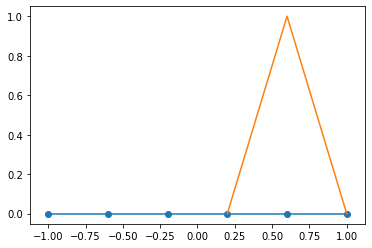

In [152]:
plt.plot(x, np.zeros(np.shape(x)))
plt.scatter(x_nodes, np.zeros(np.shape(x_nodes)))

j = 4
plt.plot([x_nodes[j-1], x_nodes[j], x_nodes[j+1]], [0, 1, 0])

Consider the weighted residual for node $j$ given by
$$ \Pi_j = \int_L w_j (T_{xx} + f) dx $$

$$ \Pi_j = \int_L w_jT_{xx} dx + \int_L w_jf~dx $$

Using integration by parts on the first term

$$ \Pi_j = [w_jT_x]_{-L/2}^{L/2} - \int_L w_{jx}T_x ~dx + \int_L w_jf ~dx$$

Since $w_j$ is defined only over elements $E_{j-1}$ and $E_{j}$, we can restrict the integral to these elements

$$ \Pi_j = [w_jT_x]_{-L/2}^{L/2} - \int_{E_{j-1}} w_{jx}T_x ~dx - \int_{E_j} w_{jx}T_x ~dx + \int_{E_{j-1}} w_jf ~dx \int_{E_{j}} w_jf ~dx$$

Similarly, we can write

$$ \Pi_{j+1} = [w_{j+1}T_x]_{-L/2}^{L/2} - \int_{E_{j}} w_{{j+1}x}T_x ~dx - \int_{E_j+1} w_{{j+1}x}T_x ~dx + \int_{E_{j}} w_{j+1}f ~dx \int_{E_{j+1}} w_{j+1}f ~dx$$

Let us collect the terms associated with the $E_j$ element in the following matrix equation

$$\left\{ \begin{array}{1}
\Pi_j \\
\Pi_{j+1} \end{array} \right\}_{E_j} = \left\{ \begin{array}{1}
-\int_{E_j} w_{jx}T_x ~dx\\ 
- \int_{E_{j}} w_{{j+1}x}T_x ~dx 
\end{array} \right\} + \left\{ \begin{array}{1} 
 \int_{E_{j}} w_jf ~dx \\
 \int_{E_{j}} w_{j+1}f ~dx \end{array} \right\} $$
 

the $[w_{j+1}T_x]_{-L/2}^{L/2}$ terms are dealt with later, note that they are non zero only on the boundaries. Using the Galerkin method $w_i = \phi_i$ and expanding the integrals we get

$$\left\{ \begin{array}{1}
\Pi_j \\
\Pi_{j+1} \end{array} \right\}_{E_j} = \left\{ \begin{array}{1}
-\int_{E_j} \frac{-1}{\Delta x} ( \frac{a_j}{-\Delta x} + \frac{a_{j+1}}{\Delta x}) ~dx\\ 
-\int_{E_j} \frac{1}{\Delta x} ( \frac{a_j}{-\Delta x} + \frac{a_{j+1}}{\Delta x}) ~dx 
\end{array} \right\} + \left\{ \begin{array}{1} 
 \int_{E_{j}} \frac{x_{j+1}-x}{\Delta x} 50e^x ~dx \\
 \int_{E_{j}} \frac{x-x_j}{\Delta x}50e^x ~dx \end{array} \right\} $$
 

We can write this as
$$\left\{ \begin{array}{1}
\Pi_j \\
\Pi_{j+1} \end{array} \right\}_{E_j} = \frac{1}{\Delta x} \begin{bmatrix}
-1 & 1 \\
1 & -1 \end{bmatrix} \left\{ \begin{array}{c}
a_j\\ 
a_{j+1} \end{array} \right\} + \left\{ \begin{array}{1} 
 \frac{50}{\Delta x} (-x_{j+1} e^{x_j} + e^{x_{j+1}} + x_j e^{x_j} - e^{x_j}) \\
  \frac{50}{\Delta x} (x_{j+1} e^{x_{j+1}} - e^{x_{j+1}} - x_j e^{x_{j+1}} + e^{x_j}) \end{array} \right\} $$

In [153]:
#ppe = 20 # points per element
#x = np.linspace(x_start, x_end, (n_elem)*(ppe-1)+1)

0.4
0.4
0.40000000000000013
0.3999999999999999
0.3999999999999999


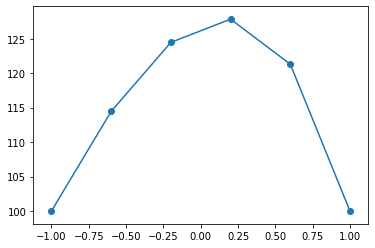

In [169]:
# Populate global [K] matrix
K = np.zeros([n_elem+1, n_elem+1])
F = np.zeros([n_elem+1, 1])

for j in range(0, n_elem):
    
    dx = x_nodes[j+1] - x_nodes[j]
    print(dx)
    
    K[j,j] += -1/dx 
    K[j,j+1] += 1/dx
    
    K[j+1,j] += 1/dx 
    K[j+1,j+1] += -1/dx

    # some definitions for brevity
    x1, x2 = x_nodes[j], x_nodes[j+1]
    e1, e2 = np.exp(x1), np.exp(x2)
    
    # F terms
    F[j,0] += (-50/dx) * (-x2*e1 + e2 + x1*e1 - e1)
    F[j+1, 0] += (-50/dx) * (x2*e2 - e2 - x1*e2 + e1)
    
# Boundary Conditions
K[0,0], K[n_elem, n_elem] = 1, 1
F[0,0], F[n_elem, 0] = 100, 100

K[n_elem, n_elem -1] = 0
K[0, 1] = 0
a = np.linalg.solve(K, F)
    
plt.plot(x_nodes, a)    
plt.scatter(x_nodes, a)       

    

In [155]:
x_nodes

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [166]:
K

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.5, -5. ,  2.5,  0. ,  0. ,  0. ],
       [ 0. ,  2.5, -5. ,  2.5,  0. ,  0. ],
       [ 0. ,  0. ,  2.5, -5. ,  2.5,  0. ],
       [ 0. ,  0. ,  0. ,  2.5, -5. ,  2.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [167]:
a

array([[100.        ],
       [114.45741413],
       [124.46548215],
       [127.83590577],
       [121.30412753],
       [100.        ]])